In [464]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'

In [403]:
df = pd.read_csv('/Users/unchil/Downloads/water_20240724081800.csv')
df.head()

,수질현황별(1),1996,1996.1,1996.2,1996.3,1996.4,1996.5,1996.6,1997,1997.1,...,2022.4,2022.5,2022.6,2023,2023.1,2023.2,2023.3,2023.4,2023.5,2023.6
0,수질현황별(1),수온 (℃),수소이온농도 (pH),용존산소 DO (㎎/ℓ),생물화학적산소요구량 BOD (㎎/ℓ),화학적산소요구량 COD (㎎/ℓ),부유물질 SS (㎎/ℓ),총대장균군 (MPN/100㎖),수온 (℃),수소이온농도 (pH),...,화학적산소요구량 COD (㎎/ℓ),부유물질 SS (㎎/ℓ),총대장균군 (MPN/100㎖),수온 (℃),수소이온농도 (pH),용존산소 DO (㎎/ℓ),생물화학적산소요구량 BOD (㎎/ℓ),화학적산소요구량 COD (㎎/ℓ),부유물질 SS (㎎/ℓ),총대장균군 (MPN/100㎖)
1,암사,13.6,8.2,9.5,2.3,4,12.7,6200,16,8.3,...,3.3,5.2,26481.7,15.9,8.2,10.9,1,3.6,4.2,8115.8
2,구의,13.5,8.2,9.3,2.1,3.6,7.9,7600,14,8.4,...,3.7,8.5,522,15,8.3,11.1,1.4,3.6,5.4,3159.3
3,잠실,14,7.5,8.3,4,5.8,18.9,28000,14,8.6,...,3.5,5.3,23718.3,15.9,8.3,11,1.1,3.7,5.6,55518.3
4,보광,13.9,7.5,8,4.1,5.8,13.4,67000,14,7.9,...,4.1,7.1,155000,16.3,7.9,10.3,1.6,4.5,8.5,66083.3


In [ ]:
#수온 (℃)	수소이온농도 (pH)	용존산소 DO (㎎/ℓ)	생물화학적산소요구량 BOD (㎎/ℓ)	화학적산소요구량 COD (㎎/ℓ)	부유물질 SS (㎎/ℓ)	총대장균군 (MPN/100㎖)

In [409]:
def makeData():
    new_columns = ['Location', 'Temp', 'pH', 'DO', 'BOD', 'COD', 'SS', 'MPN', 'Year']
    df_data = pd.DataFrame(data=None, columns=new_columns)
    df_list = []
    
    date = pd.date_range(start='1996', end='2023' , freq='YS')
    columns = []
    
    for col in date.year:

        columns.append(df.columns[0])
        for i in [0,1,2,3,4,5,6]:
            if i == 0:
                columns.append(f'{col}')
            else:
                columns.append(f'{col}.{i}')
                
        df_temp = df.loc[1: , columns]

        df_temp['Year'] = f'{col}'
        columns.append('Year')
    
        df_temp = df_temp.rename(     
            columns= { 
                columns[0]:new_columns[0], 
                columns[1]:new_columns[1],
                columns[2]:new_columns[2],
                columns[3]:new_columns[3],
                columns[4]:new_columns[4],
                columns[5]:new_columns[5],
                columns[6]:new_columns[6],
                columns[7]:new_columns[7], 
                columns[8]:new_columns[8]}
        )
        df_temp = df_temp.replace(to_replace='-', value=np.nan)
        df_list.append(df_temp)
        columns.clear()

    df_data = pd.concat(df_list, axis=0)
    del(df_list)
    return df_data

In [410]:
df_water = makeData()

In [411]:
df_water

,Location,Temp,pH,DO,BOD,COD,SS,MPN,Year
1,암사,13.6,8.2,9.5,2.3,4,12.7,6200,1996
2,구의,13.5,8.2,9.3,2.1,3.6,7.9,7600,1996
3,잠실,14,7.5,8.3,4,5.8,18.9,28000,1996
4,보광,13.9,7.5,8,4.1,5.8,13.4,67000,1996
5,노량진,14.5,7.6,8.7,3.9,5.7,12.5,56000,1996
...,...,...,...,...,...,...,...,...,...
21,청계천(1),14.5,7.7,10.5,0.6,1.8,1.6,116.6,2023
22,청계천(2),14.7,7.8,10.6,0.7,1.9,4.1,12880.8,2023
23,청계천(3),16.1,7.6,10.5,1.7,2.8,4.5,22938.3,2023
24,성북천,15.3,7.4,9.1,1.1,2.5,2.1,9505.8,2023


In [422]:
df_water = df_water.astype( {'Temp':'float32', 'pH':'float32', 'DO':'float32', 'BOD':'float32', 'COD':'float32', 'SS':'float32', 'MPN':'float32'} )

In [423]:
df_water.index = pd.to_datetime(df_water.Year).dt.year
df_water

,Location,Temp,pH,DO,BOD,COD,SS,MPN,Year
Year,,,,,,,,,
1996,암사,13.6,8.2,9.5,2.3,4.0,12.7,6200.000000,1996
1996,구의,13.5,8.2,9.3,2.1,3.6,7.9,7600.000000,1996
1996,잠실,14.0,7.5,8.3,4.0,5.8,18.9,28000.000000,1996
1996,보광,13.9,7.5,8.0,4.1,5.8,13.4,67000.000000,1996
1996,노량진,14.5,7.6,8.7,3.9,5.7,12.5,56000.000000,1996
...,...,...,...,...,...,...,...,...,...
2023,청계천(1),14.5,7.7,10.5,0.6,1.8,1.6,116.599998,2023
2023,청계천(2),14.7,7.8,10.6,0.7,1.9,4.1,12880.799805,2023
2023,청계천(3),16.1,7.6,10.5,1.7,2.8,4.5,22938.300781,2023


In [514]:
df_water.groupby([ 'Location']).agg( {'DO':['min', 'max', 'mean'], 'BOD':['min', 'max', 'mean'], 'COD':['min', 'max', 'mean']})

DO                   BOD                   COD                 
           min   max       mean  min   max       mean  min   max       mean
Location                                                                   
가양         7.0  11.6   9.621428  1.3   5.5   2.960714  4.6   8.3   5.725000
고덕천        8.1  15.9  11.110000  1.1   3.9   2.225000  1.5   7.0   4.325000
구의         8.7  12.4  10.900001  1.2   2.5   1.714286  3.4   5.0   3.978571
노량진        6.8  11.7   9.532143  1.6   4.3   2.907143  4.4   6.4   5.285714
도림천        7.8  13.4  10.690001  1.0   6.3   2.675000  2.7   9.4   4.945000
뚝도         5.2  12.1   9.960714  0.6   3.7   2.139286  2.4   5.6   4.371428
목감천1       7.1  11.8  10.010000  1.9  19.5   5.755000  5.2  15.7   8.010000
보광         7.2  11.9   9.778571  0.9   5.1   2.785714  3.7   6.7   4.982143
성내천        6.6  10.3   8.355000  1.6   4.8   3.050000  3.5   6.4   4.810000
성북천        9.1  14.1  11.877778  0.6   2.1   1.294444  1.7   4.2   2.611111
안양천10      3.8  11.1   7.032143  1.7  17.9   7.639286  6.3  21.6  10.442857
암사         8.0  12.4  10.707143  0.8   2.3   1.350000  3.2   4.4   3.721428
양재천        8.6  11.7  10.260000  0.8   6.2   2.505000  3.1   7.0   4.910000
영등포        7.1  11.7   9.739286  1.0   4.3   2.625000  4.4   6.7   5.196429
우이천        7.1  13.7  11.916667  1.0   4.2   1.877778  2.8   5.4   3.755555
잠실         8.3  12.3  10.928572  0.9   4.0   1.585714  3.3   5.8   3.950000
정릉천        9.6  16.4  12.275000  0.7   2.8   1.365000  1.7   4.7   2.605000
중랑천6       3.7   9.8   7.550000  1.8  17.6   9.285714  5.7  14.9  10.146429
청계천(1)    10.3  13.4  11.073684  0.4   1.9   0.815789  1.7   2.8   2.178947
청계천(2)    10.2  14.4  11.452941  0.5   1.4   0.911765  1.9   3.1   2.400000
청계천(3)     9.6  12.6  11.055555  0.9   2.3   1.444444  2.3   3.8   2.855556
탄천6        5.5  10.0   7.817857  1.7  23.6  11.250000  5.6  13.3   9.335714
팔당댐        9.1  12.0  10.715000  1.0   1.3   1.185000  3.3   4.0   3.690000
행주         6.6  11.4   9.353571  2.3   6.4   3.764286  5.2   8.1   6.167857
홍제천       10.6  13.6  12.120000  1.1   7.7   2.780000  2.8   7.1   4.110000

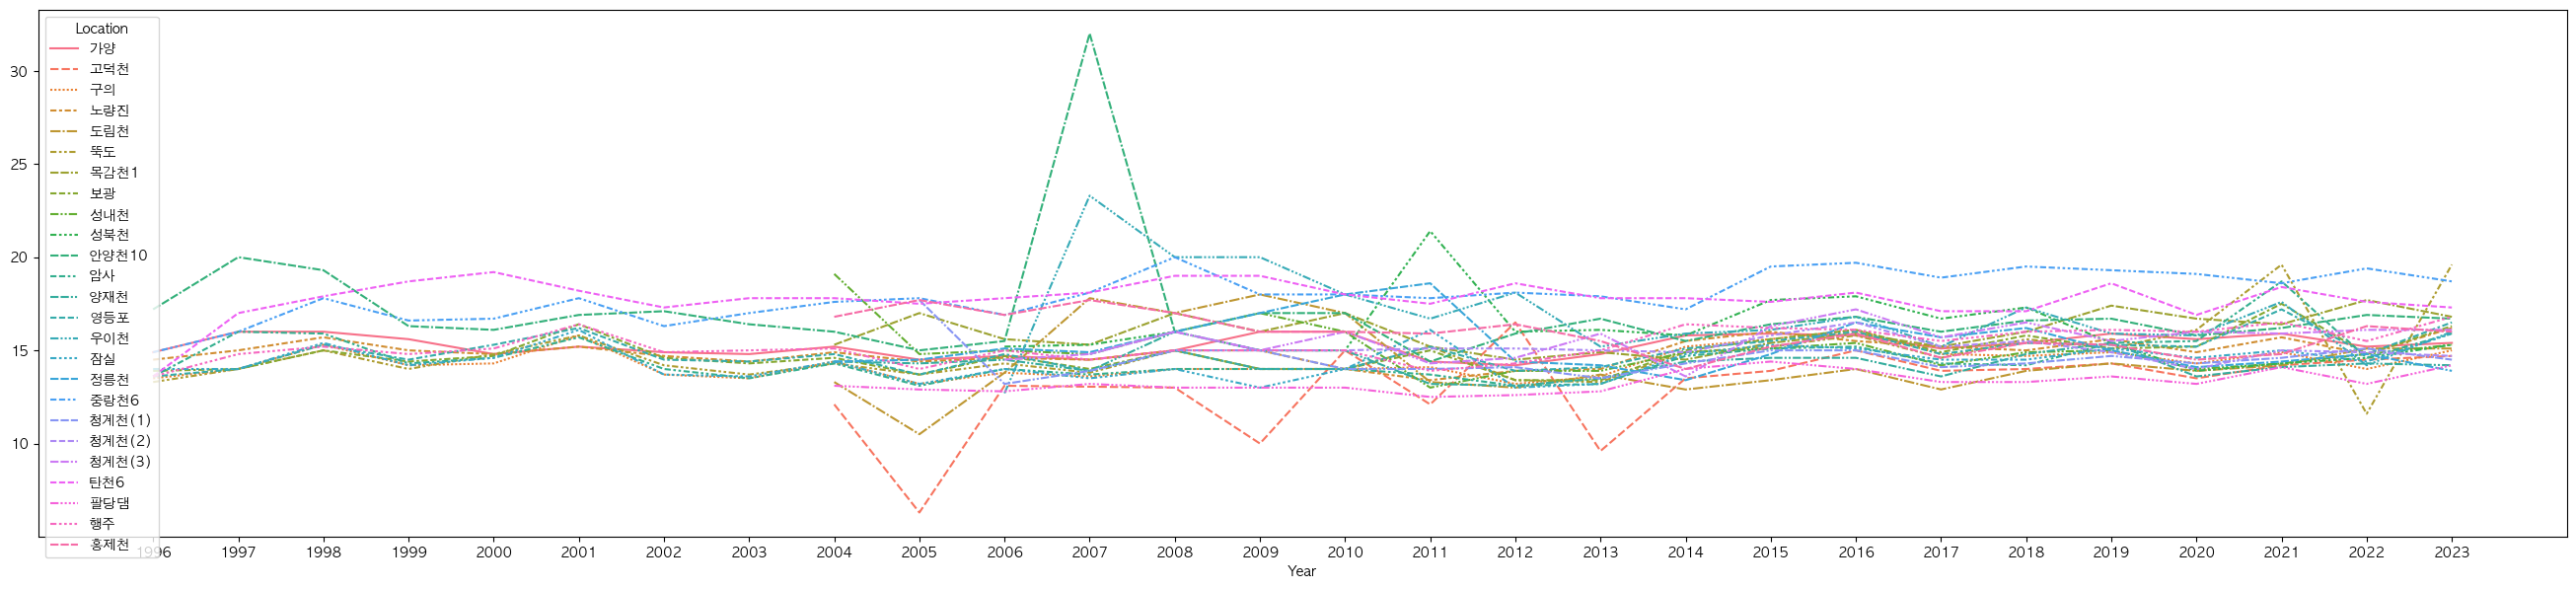

In [470]:
a = df_water.pivot(index='Year', columns='Location', values=['Temp'])
fig = plt.figure(figsize=(26,6), layout='constrained')
(ax1) = fig.subplots(1,1)
sns.lineplot( data = a.Temp[:] , ax = ax1)
plt.show()

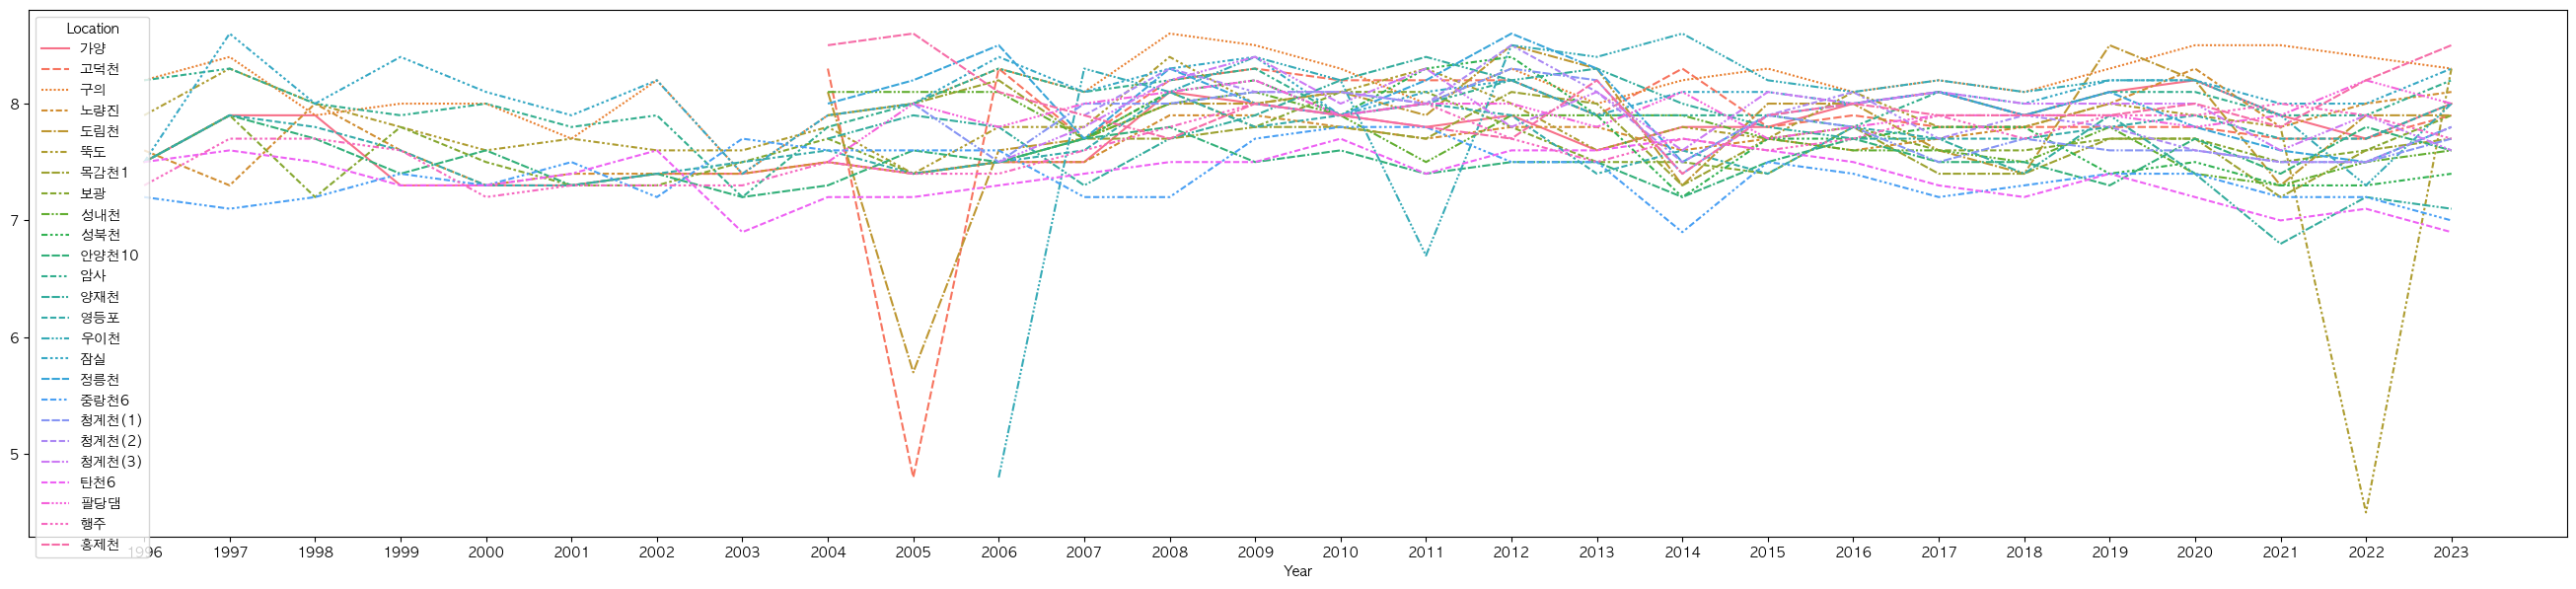

In [472]:
a = df_water.pivot(index='Year', columns='Location', values=['pH'])
fig = plt.figure(figsize=(26,6), layout='constrained')
(ax1) = fig.subplots(1,1)
sns.lineplot( data = a.pH[:] , ax = ax1)
plt.show()


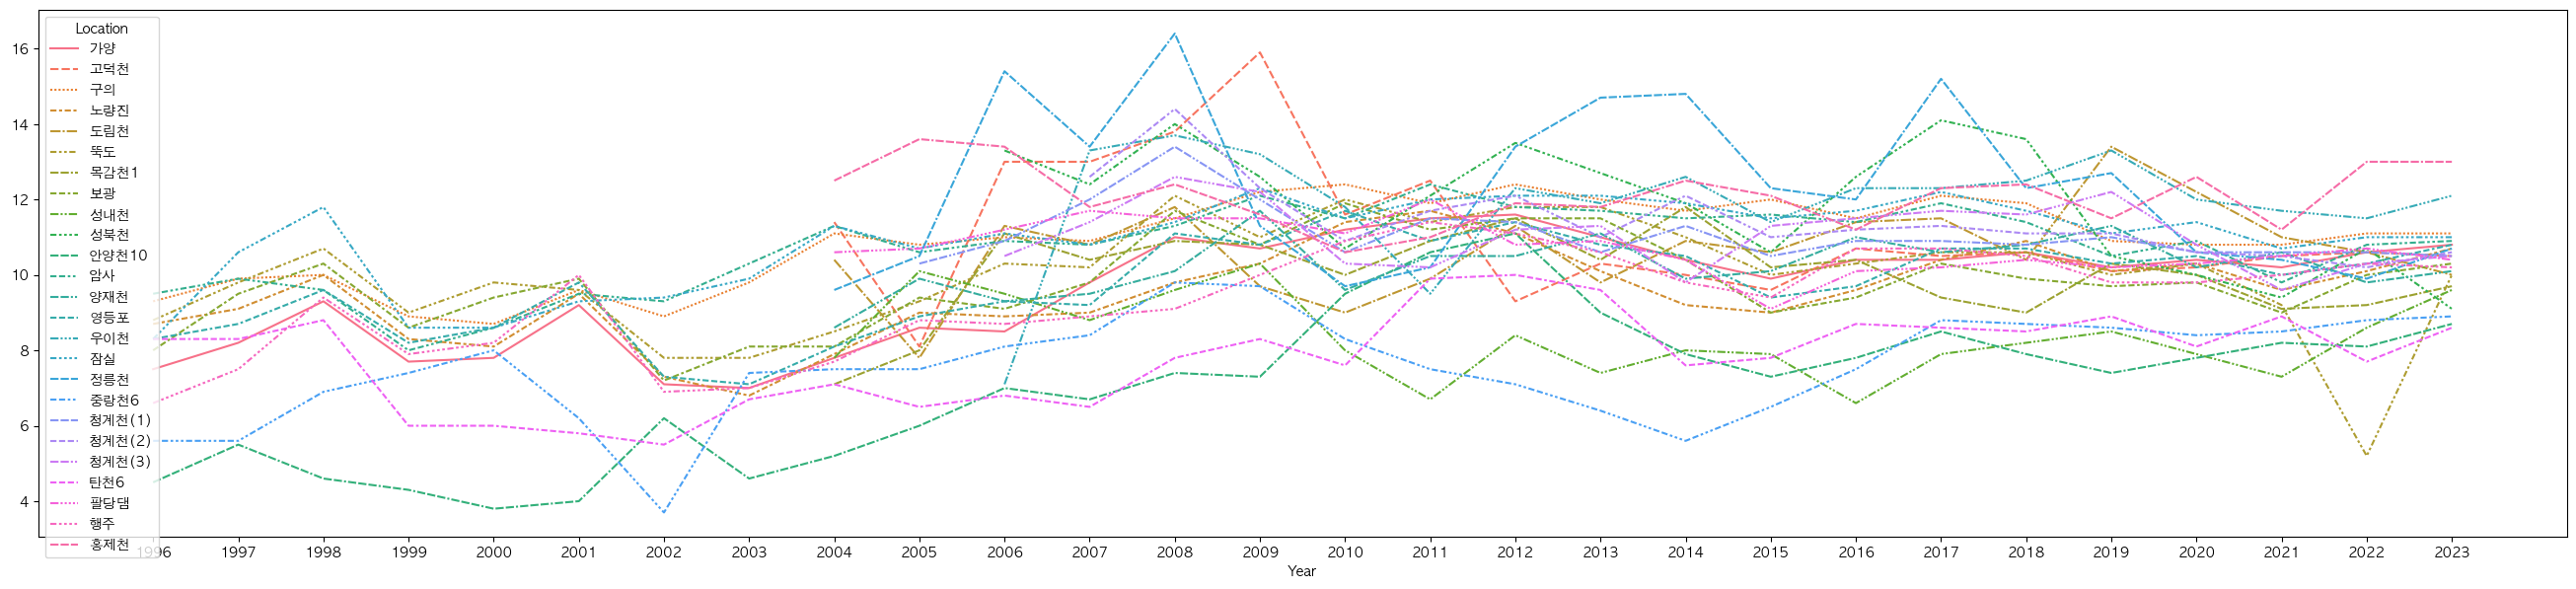

In [473]:
a = df_water.pivot(index='Year', columns='Location', values=['DO'])
fig = plt.figure(figsize=(26,6), layout='constrained')
(ax1) = fig.subplots(1,1)
sns.lineplot( data = a.DO[:] , ax = ax1)
plt.show()

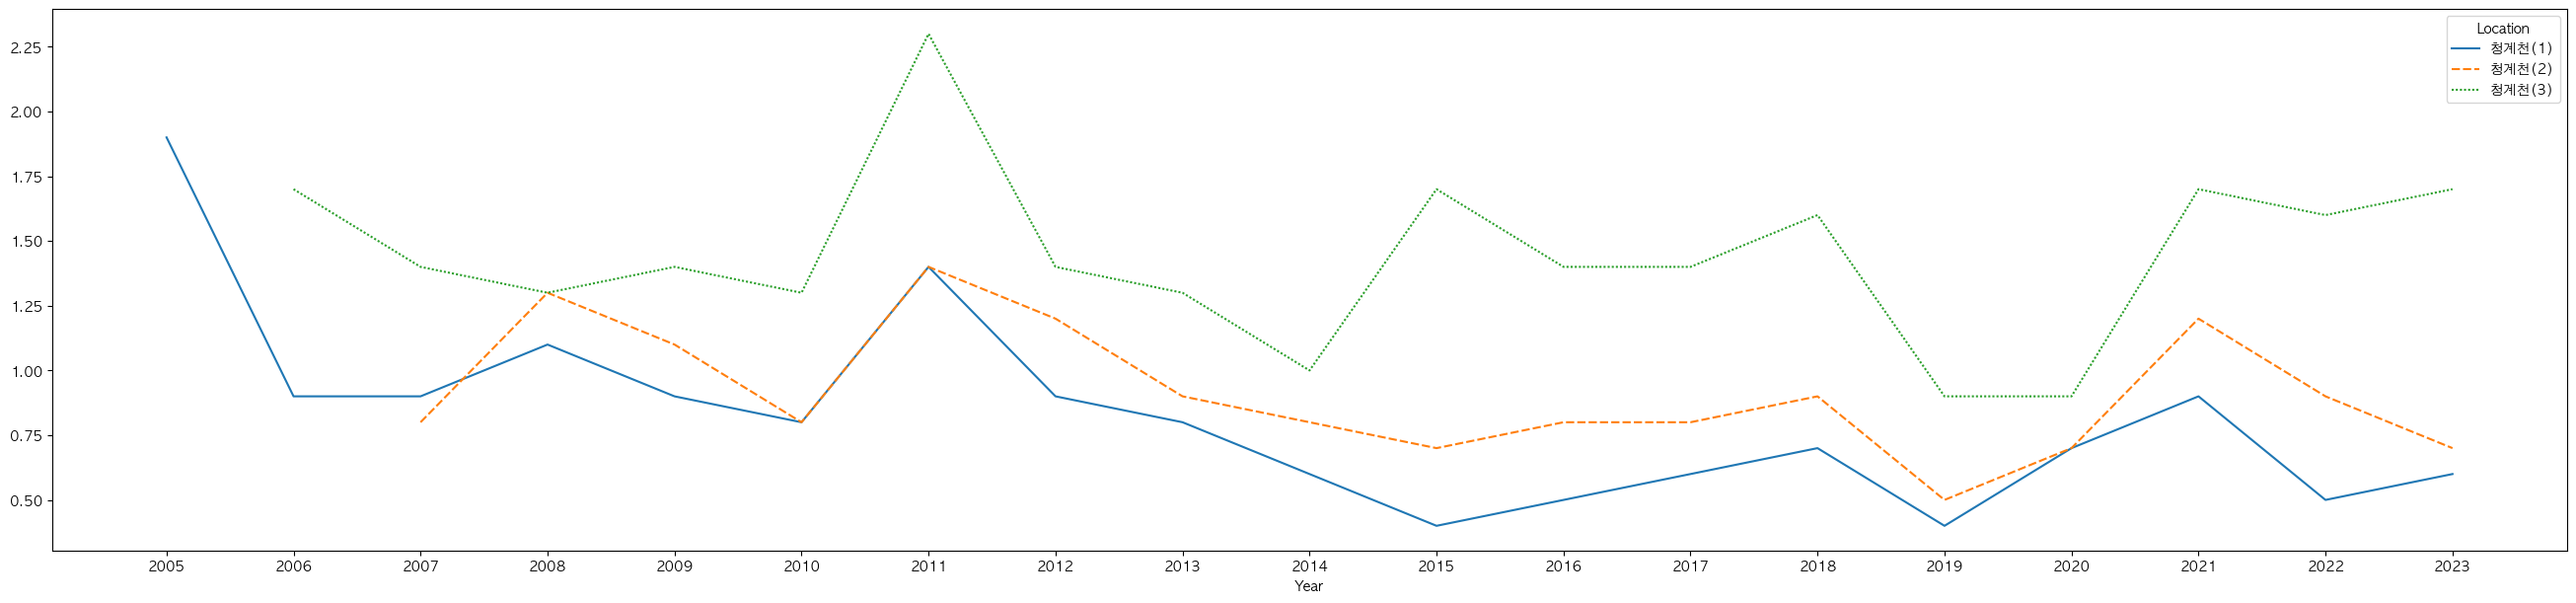

In [507]:
a = df_water.pivot(index='Year', columns='Location', values=['BOD'])
fig = plt.figure(figsize=(26,6), layout='constrained')
(ax1) = fig.subplots(1,1)
sns.lineplot( data = a.BOD[['청계천(1)', '청계천(2)', '청계천(3)']] , ax = ax1)
plt.show()

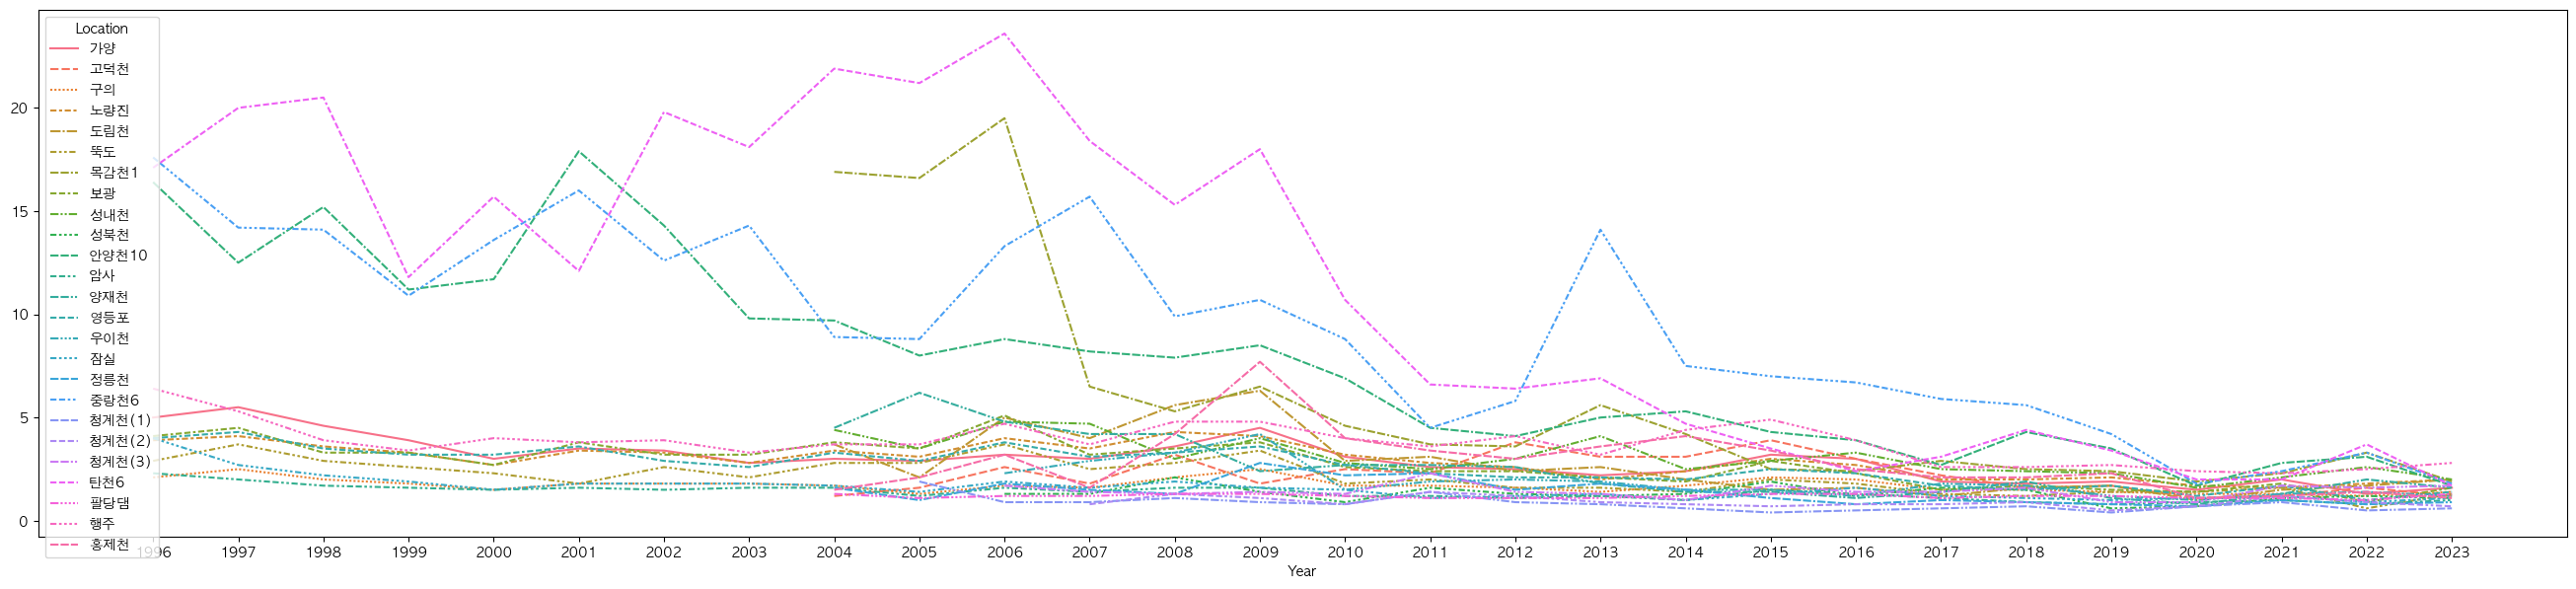

In [474]:
a = df_water.pivot(index='Year', columns='Location', values=['BOD'])
fig = plt.figure(figsize=(26,6), layout='constrained')
(ax1) = fig.subplots(1,1)
sns.lineplot( data = a.BOD[:] , ax = ax1)
plt.show()

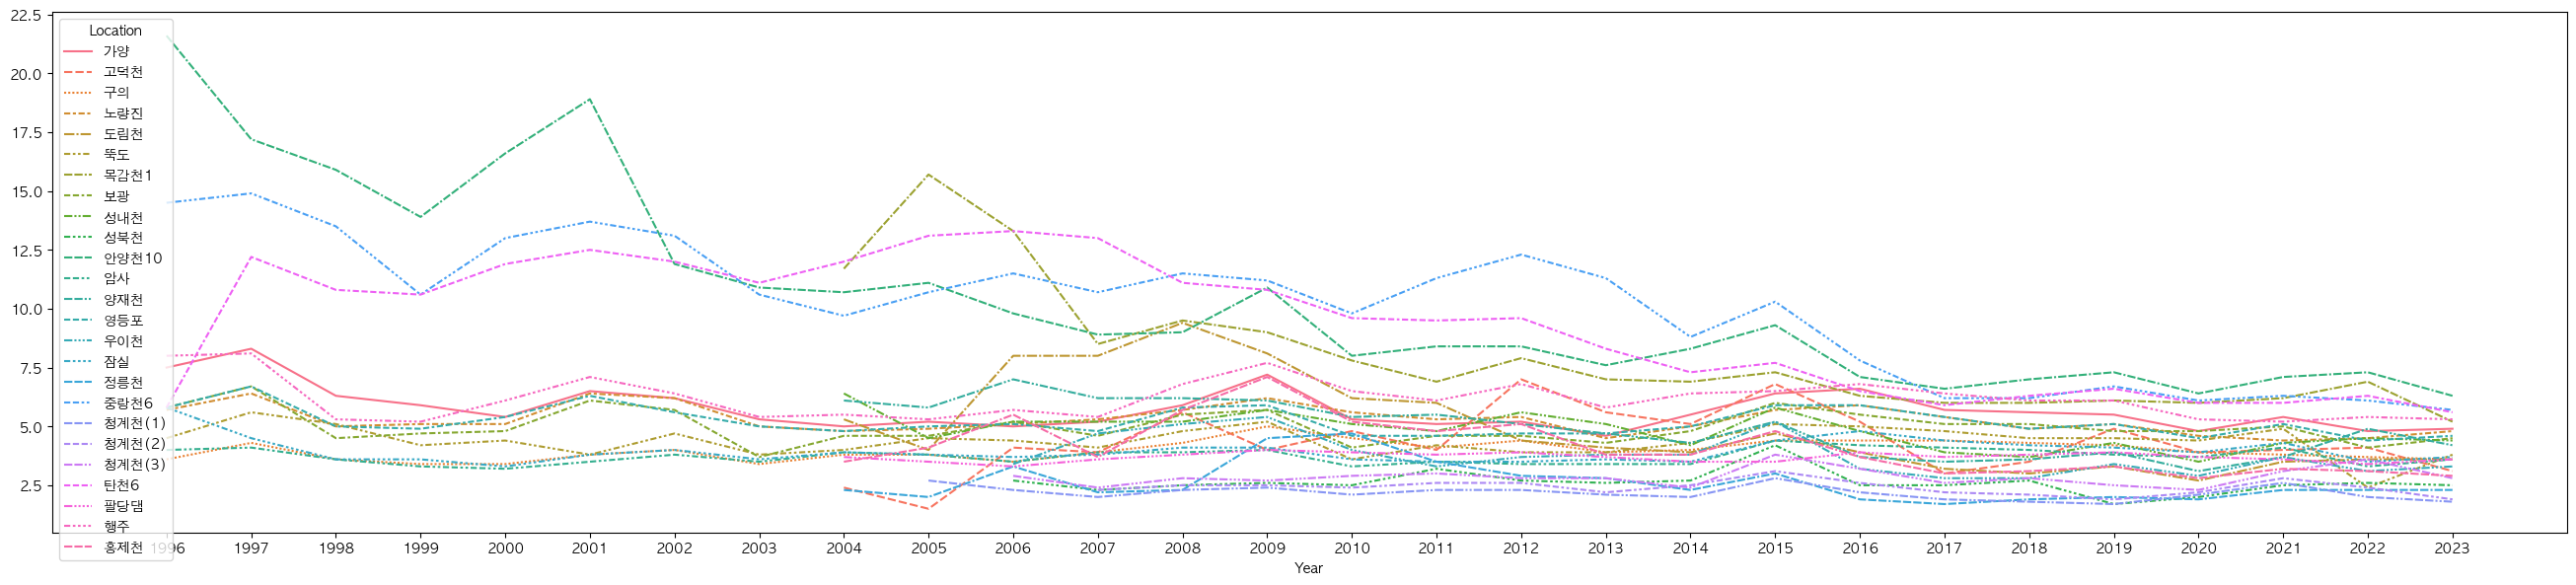

In [517]:
a = df_water.pivot(index='Year', columns='Location', values=['COD'])
fig = plt.figure(figsize=(26,6), layout='constrained')
(ax1) = fig.subplots(1,1)
sns.lineplot( data = a.COD[:] , ax = ax1)
plt.show()

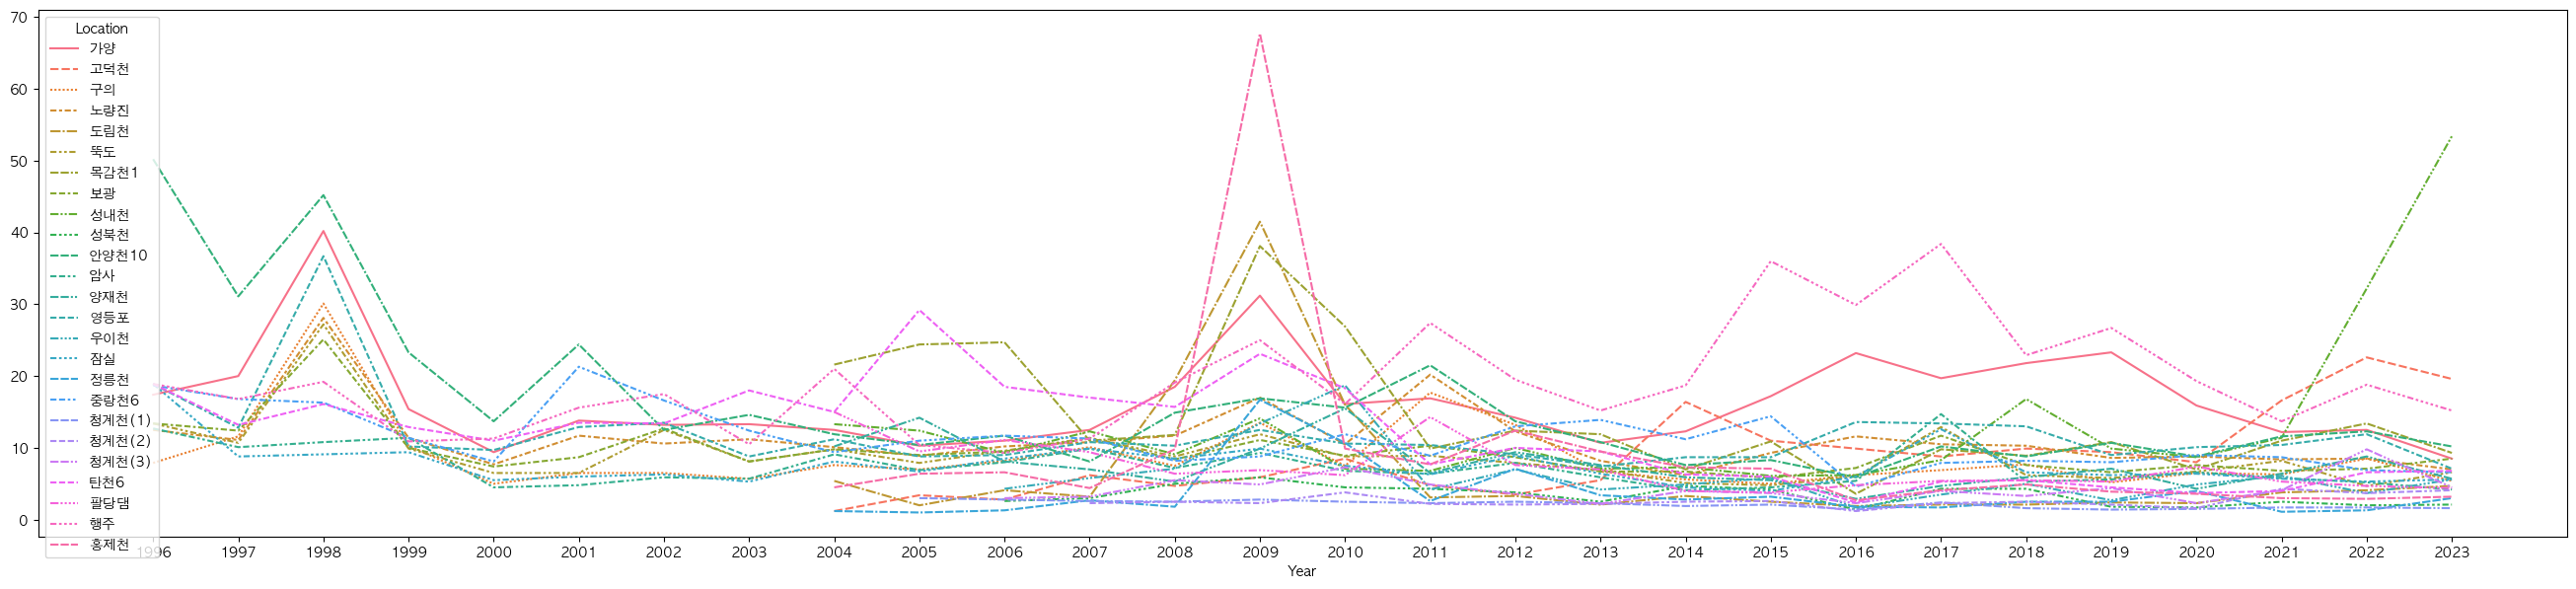

In [476]:
a = df_water.pivot(index='Year', columns='Location', values=['SS'])
fig = plt.figure(figsize=(26,6), layout='constrained')
(ax1) = fig.subplots(1,1)
sns.lineplot( data = a.SS[:] , ax = ax1)
plt.show()

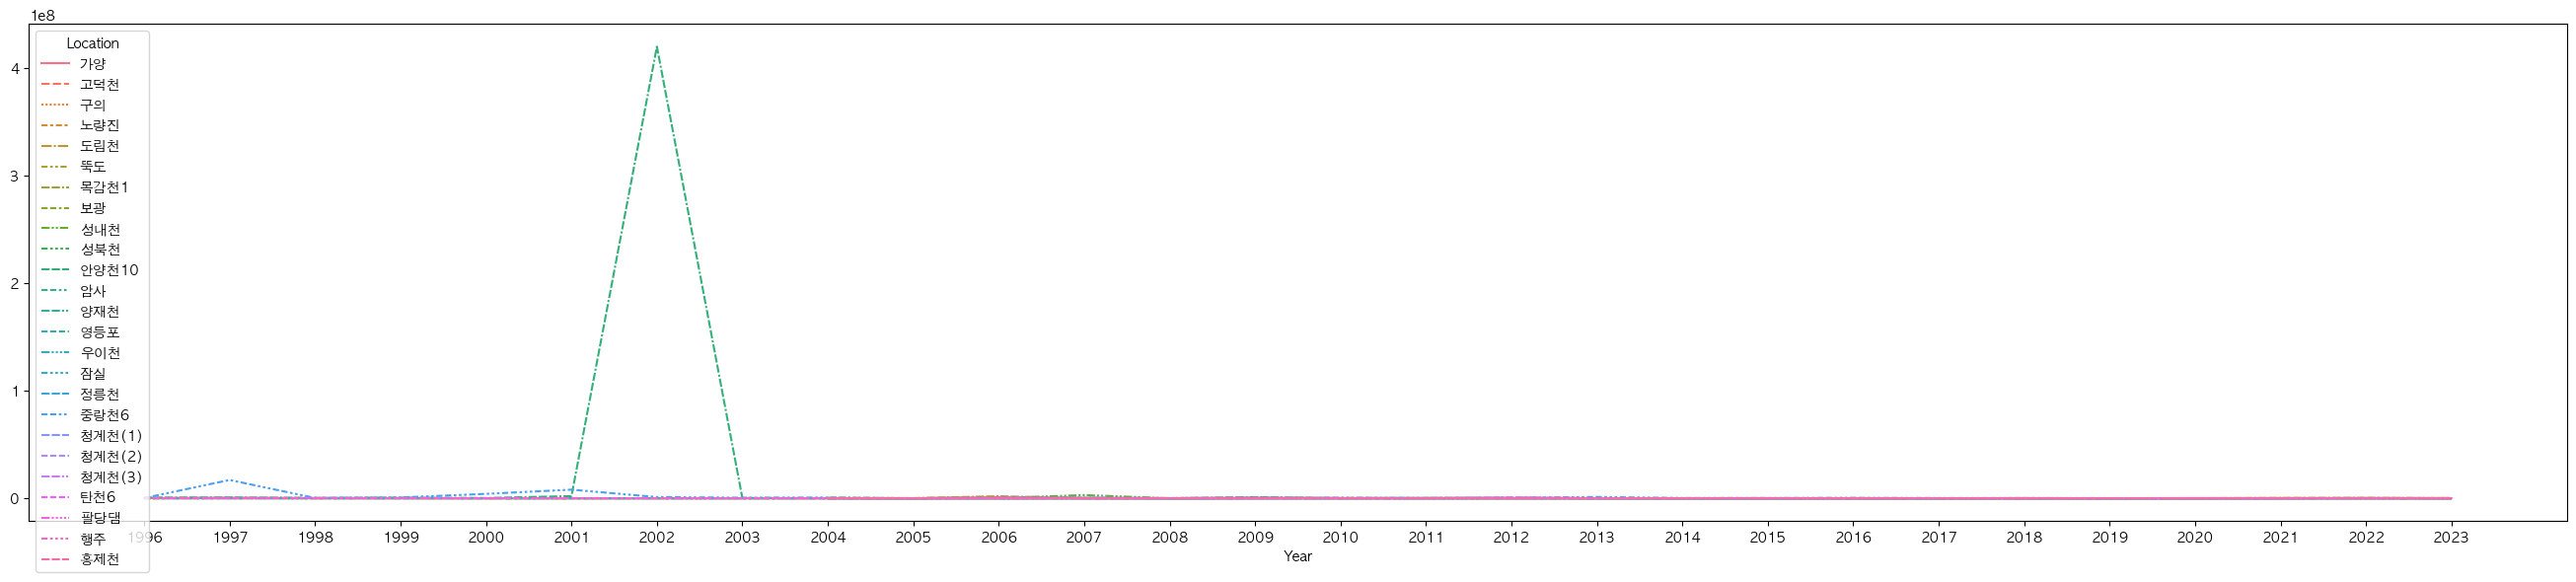

In [502]:
# '안양천10',
a = df_water.pivot(index='Year', columns='Location', values=['MPN'])
fig = plt.figure(figsize=(26,6), layout='constrained')
(ax1) = fig.subplots(1,1)
sns.lineplot( data = a.MPN[:], ax = ax1)
plt.show()

In [479]:
df_water.Location.unique()

array(['암사', '구의', '잠실', '보광', '노량진', '영등포', '가양', '행주', '탄천6', '중랑천6',
       '안양천10', '뚝도', '팔당댐', '홍제천', '양재천', '정릉천', '도림천', '목감천1', '고덕천',
       '성내천', '청계천(1)', '청계천(2)', '청계천(3)', '성북천', '우이천'], dtype=object)

In [504]:
df_water.loc[df_water.Location == '안양천10']

,Location,Temp,pH,DO,BOD,COD,SS,MPN,Year
Year,,,,,,,,,
1996,안양천10,17.200001,7.5,4.5,16.4,21.600000,50.200001,6.500000e+05,1996
1997,안양천10,20.000000,7.9,5.5,12.5,17.200001,31.100000,7.100000e+05,1997
1998,안양천10,19.299999,7.7,4.6,15.2,15.900000,45.200001,3.700000e+05,1998
1999,안양천10,16.299999,7.4,4.3,11.2,13.900000,23.299999,6.000000e+05,1999
2000,안양천10,16.100000,7.6,3.8,11.7,16.600000,13.700000,2.300000e+05,2000
2001,안양천10,16.900000,7.3,4.0,17.9,18.900000,24.400000,2.000000e+06,2001
2002,안양천10,17.100000,7.4,6.2,14.3,11.900000,12.500000,4.200000e+08,2002
2003,안양천10,16.400000,7.2,4.6,9.8,10.900000,14.600000,2.300000e+05,2003
2004,안양천10,16.000000,7.3,5.2,9.7,10.700000,11.900000,1.654170e+05,2004


In [505]:
df_water.loc[df_water.Location == '홍제천']

,Location,Temp,pH,DO,BOD,COD,SS,MPN,Year
Year,,,,,,,,,
1996,홍제천,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996
1997,홍제천,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997
1998,홍제천,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998
1999,홍제천,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999
2000,홍제천,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000
2001,홍제천,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001
2002,홍제천,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002
2003,홍제천,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003
2004,홍제천,16.799999,8.5,12.5,1.5,3.5,4.500000,31889.000000,2004
